# **Problem Statement:**
In the competitive landscape of the banking industry, maintaining customer loyalty and reducing churn rates are crucial for sustained business success. The problem statement aims to develop predictive models that leverage customer attributes to forecast whether a bank customer is likely to stay or churn. By identifying key factors influencing customer retention, the project seeks to empower banks with actionable insights to proactively engage with at-risk customers, tailor retention strategies, and ultimately enhance customer satisfaction and loyalty. 
The dataset can be found at [Kaggle](https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv/data)
## **Key Takeaway:**
This project aims to predict bank customer churn by analyzing various attributes such as demographics, account details, and transaction history. It utilizes machine learning techniques to identify customers likely to leave, enabling targeted strategies for improving retention.

In [264]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [265]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **Dividing the dataset into dependent and independent variables**

In [266]:
x = dataset.iloc[:,3:13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [267]:
y = dataset.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

#### **Encoding the categorical data**

In [268]:
geography = pd.get_dummies(x['Geography'],drop_first=True)
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [269]:
gender = pd.get_dummies(x['Gender'],drop_first=True)
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [270]:
# Concatenate the Data Frames
x = x.drop(['Geography','Gender'],axis=1)
x = pd.concat([x,geography,gender],axis=1) # axis = 1 means concatenate along columns
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


#### **Splitting the dataset into training and test set**

In [271]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#### **Feature Scaling**

In [272]:
from sklearn.preprocessing import StandardScaler
# standard scaling is based on z score to normalize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [273]:
x_train

array([[-0.09792126, -0.55759842, -1.03635146, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-1.12612023,  0.01725942,  0.69700901, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-0.62230274,  3.5622161 ,  0.00366482, ..., -0.56987189,
        -0.5731713 , -1.08347268],
       ...,
       [ 0.89943174, -0.36597914,  0.00366482, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-0.62230274, -0.07855022,  1.39035319, ..., -0.56987189,
         1.74467913, -1.08347268],
       [-0.28299708,  0.87954618, -1.38302356, ...,  1.75478035,
        -0.5731713 , -1.08347268]])

In [274]:
x_test

array([[-0.55032881, -0.36597914,  1.0436811 , ...,  1.75478035,
        -0.5731713 , -1.08347268],
       [-1.31119605,  0.11306906, -1.03635146, ..., -0.56987189,
        -0.5731713 , -1.08347268],
       [ 0.57040807,  0.30468834,  1.0436811 , ..., -0.56987189,
         1.74467913, -1.08347268],
       ...,
       [ 0.35448628,  0.11306906, -1.03635146, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [ 0.42646021,  2.89154862,  1.73702529, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [ 0.82745781,  0.97535582, -0.34300727, ...,  1.75478035,
        -0.5731713 , -1.08347268]])

In [275]:
x_train.shape

(7000, 11)

In [276]:
x_test.shape

(3000, 11)

## **ANN**

In [277]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU      
from tensorflow.keras.layers import Dropout

In [278]:
# Initialising the ANN
classifier = Sequential()

In [279]:
# Adding the input layer 
classifier.add(Dense(units=11,activation='relu'))

In [280]:
# First Hidden Layer
classifier.add(Dense(units=6,activation='relu'))
# Adding the Dropout layer
classifier.add(Dropout(0.2))

In [281]:
# Second Hidden Layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [282]:
# Output Layer(binary classification)
classifier.add(Dense(units=1,activation='sigmoid'))

In [283]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [284]:
# Early stopping
import tensorflow
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [285]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [286]:
# validation_split=0.33 means 67% of the data will be used for validation
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 1000,callbacks=earlyStopping)

Epoch 1/1000


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7882 - loss: 0.5005 - val_accuracy: 0.8317 - val_loss: 0.3926
Epoch 2/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.8180 - loss: 0.4231 - val_accuracy: 0.8295 - val_loss: 0.3940
Epoch 3/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8189 - loss: 0.4162 - val_accuracy: 0.8369 - val_loss: 0.3799
Epoch 4/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.8442 - loss: 0.3727 - val_accuracy: 0.8390 - val_loss: 0.3835
Epoch 5/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.8440 - loss: 0.3877 - val_accuracy: 0.8464 - val_loss: 0.3714
Epoch 6/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8392 - loss: 0.3841 - val_accuracy: 0.8330 - val_loss: 0.3797
Epoch 7/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.8450 - loss: 0.3814 - val_accuracy: 0.8460 - val_loss: 0.3716
Epoch 8/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.8423 - loss: 0.3729 - val

In [293]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'model accuracy')

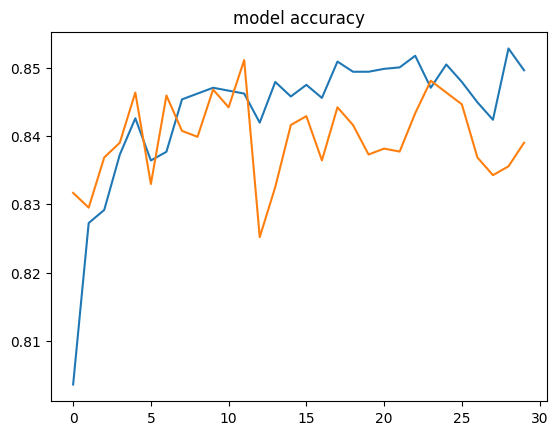

In [294]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')

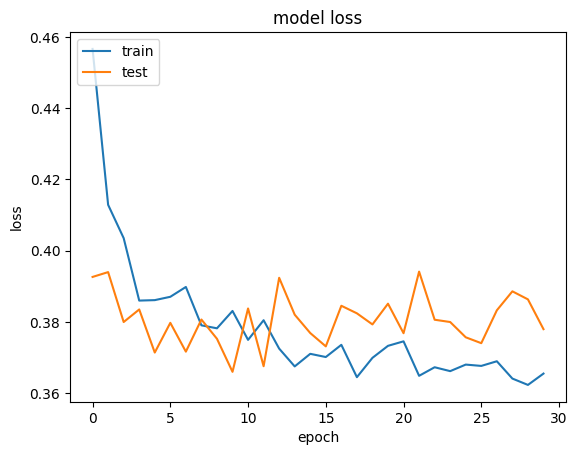

In [296]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### **Making Prediction & Evaluating Model**

In [290]:
# predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step


In [291]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2340,   39],
       [ 404,  217]], dtype=int64)

In [292]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8523333333333334